**Name: Christ-Brian Amedjonekou**  
**Date: 04/16/2019**  
**PHYS 3600ID-D862 (Machine Learning) HW 6**  
**Spring 2019, Section: D862, Code: 37026**  
**Instructor: Viviana Acquaviva**


***I certify that my work is my own.***

In [1]:
#Doing all the imports for you

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_val_predict
%matplotlib inline

In [2]:
features = pd.read_csv('Datasets/logRegression_features.txt', names= ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4'])
labels = pd.read_csv('Datasets/logRegression_labels.txt', names= ['Target'])

In [3]:
labels = np.array(labels['Target'])

In [4]:
np.sum(np.array(labels) > 0), np.sum(np.array(labels) == 0) # This "small" data set is more balanced than the original

(483, 2000)

1\. This data set contains four features and the RR Lyrae designation (0/1). Which one would you think makes a better model, linear regression or logistic regression, and why?

* **Logistic Regression would make a better model because of the nature of the dataset. The nature of the data is categorical, based on the target vector (0 or 1). As the data does not have a target vector w/ continuous outputs logistic regression would be a better choice.** 

2\. Build a logistic regression model with 5-fold cross validation; you can use the function cross_val_predict (an example of the usage can be found in the Special Report 2 notebook) to build the array with the predicted labels. Report the r2_score. Save the array with the predictions because you will need it later.

In [5]:
logisticModel = LogisticRegression(solver='liblinear')
predict_Logistic = cross_val_predict(logisticModel, features, labels, 
                                   cv=StratifiedKFold(shuffle=True, n_splits=5))

scores_Logistic = cross_val_score(logisticModel, features, labels, scoring= 'r2', 
                                  cv = StratifiedKFold(shuffle=True, n_splits=5), n_jobs= 4)

In [6]:
scores_Logistic

array([0.78224227, 0.67976804, 0.75662371, 0.78041667, 0.67708333])

3\. Now build a linear regression model with 5-fold cross validation just as above; report the r2_score. Save the array with the predictions because you will need it later. 

In [7]:
linearModel = LinearRegression()
predict_Linear = cross_val_predict(linearModel, features, labels, 
                                   cv=StratifiedKFold(shuffle=True, n_splits=5))

scores_Linear = cross_val_score(linearModel, features, labels, scoring= 'r2', 
                                  cv = StratifiedKFold(shuffle=True, n_splits=5), n_jobs= 4)

In [8]:
scores_Linear

array([0.64419565, 0.67471573, 0.67550025, 0.72405815, 0.7427754 ])

4\. Plot the histograms of the "prediction" arrays for logistic and linear regression. Remember to use labels to identify the two distributions.

In [9]:
scoreTable = {'Logistic Predictions': predict_Logistic, 
              'Linear Predictions': predict_Linear}

scoreTable = pd.DataFrame.from_dict(scoreTable)
scoreTable_names = list(scoreTable)

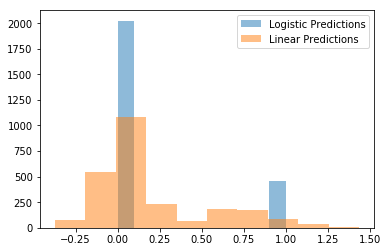

In [10]:
for name in scoreTable_names:
    plt.hist(scoreTable[name], alpha= 0.5, histtype= 'stepfilled', label= name);
plt.legend()

5\. How do the predictions differ? Which of the two models is essentially behaving like a classifier, and why?

**| [Wikipediaaaaa!!!](https://en.wikipedia.org/wiki/Logistic_regression) |**

* **Well as mentioned before, Logistic Regression can be/is being used as a classifier. This is possible through the use of logistic function for which Logistic Regression is based on. The reason as to why it can be used as a classifier is based upon the Logistic Function's characteristics. The Logistic Function is a sigmoid function which bounds predictions between 0 and 1. The sigmoid function is derived by equating a linear combination of $\text{features }\times \text{ parameters}$ ($\beta x$) to the logarithm of odds a probability $\Bigg(\log \Big(\frac{P(X)}{1 - P(X)}\Big)\Bigg)$. Since we are working w/ probabilities, results are bounded between 0 and 1 just like the Sigmoid Function/Logistic Function**


* **Linear Regression on the other cannot. That is because Linear Regression outputs "can be negative, and greater than 1 whereas probability can not". Linear Regression is used mostly for continuous targets.**

6\. Based on the code and figure below, what is the difference between using"predict" and "predict_proba"? What is the probability value that corresponds to transitioning from one class to the other?

* **'predict_proba()' returns the probability of the sample for each class in the model, while 'predict()' predicts the class label for each sample.**


* **The probability value of '0.5' corresponds to transitioning from one class to the other**

The Logistic Regression model also has an option called "predict.proba", demonstrated in the code below:

Text(0, 0.5, 'Class')

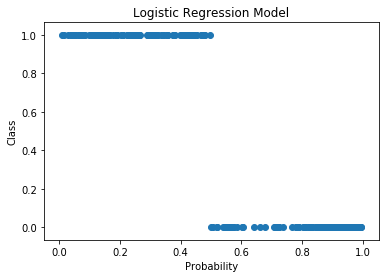

In [11]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=0)
logisticModel.fit(X_train, y_train)
probs = logisticModel.predict_proba(X_test)
pred = logisticModel.predict(X_test)

plt.scatter(probs[:,0], pred);
plt.title('Logistic Regression Model')
plt.xlabel('Probability')
plt.ylabel('Class')

In [31]:
probs[:,0]

array([0.94895352, 0.91578615, 0.10332   , 0.94182205, 0.26299332,
       0.43341349, 0.90238088, 0.96555884, 0.97641216, 0.97710267,
       0.9733869 , 0.96509077, 0.95310831, 0.98189367, 0.41207247,
       0.97960604, 0.95737107, 0.96907377, 0.93313289, 0.96550725,
       0.19154557, 0.78030821, 0.14937479, 0.98316298, 0.92157969,
       0.80931866, 0.12094905, 0.97061166, 0.95863484, 0.24322154,
       0.91762576, 0.99298333, 0.97317953, 0.95026245, 0.88078459,
       0.9620956 , 0.18996883, 0.97992813, 0.9374149 , 0.94785353,
       0.94976358, 0.97226252, 0.93075023, 0.89425032, 0.86578108,
       0.97495134, 0.96235465, 0.97832481, 0.90245635, 0.99108484,
       0.96091557, 0.11734253, 0.88907371, 0.92832648, 0.45397758,
       0.9672103 , 0.96929254, 0.56512653, 0.96616662, 0.12641452,
       0.97830142, 0.95613189, 0.98209505, 0.08186902, 0.39903086,
       0.99440029, 0.96329292, 0.43380772, 0.37343539, 0.96702603,
       0.23983247, 0.86703365, 0.91778621, 0.90780809, 0.35844

7\. For this second part, we are going to use the "study hours data set" from the Linear Regression part (you can find the data set, called data_students_hours.csv, on Blackboard). Define an array x (features) with the first column of this file and an array y (labels) with the second column.

In [12]:
DSH_df = pd.read_csv('Datasets/data_students_hours.csv', names= ['Feature', 'Labels'])
features_DSH = np.array(DSH_df['Feature'])
labels_DSH = np.array(DSH_df['Labels'])

8 \. In the linear regression notebook, we went through an example and calculated the model coefficients of a linear regression model applied to these data. In the plot of the best fit line, what is the meaning of m and b?

* **'m' represents the slope of the best fit line, while 'b' is a representation of the intercept of the best fit line. These weights/parameters are approximated by the LinearRegression() model**

In [13]:
# 5-fold cross validation predictions
predict_Linear = cross_val_predict(linearModel, features_DSH.reshape(-1,1), labels_DSH, cv= 5)

$R^2$ scores: 0.5782980814154777


Text(0, 0.5, 'F(Features)')

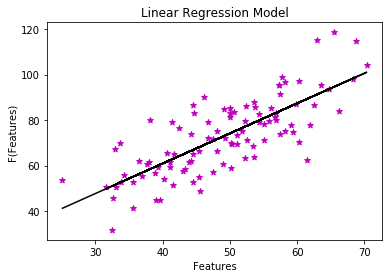

In [14]:
# plotting the points in a scatter plot
plt.scatter(features_DSH, labels_DSH,marker='*',color = 'm');

print('$R^2$ scores:',metrics.r2_score(labels_DSH, predict_Linear))

# fitting the model 
linearModel.fit(features_DSH.reshape(-1,1), labels_DSH)
plt.plot(features_DSH, linearModel.coef_* features_DSH + linearModel.intercept_, color = 'k')
plt.title('Linear Regression Model')
plt.xlabel('Features')
plt.ylabel('F(Features)')

9\. However these can also be calculated by hand using the formulas on the linear regression slides. Code up the formulas below and report your coefficients for slope and intercept.

$$S S_{xy} = \sum x_i y_i - \frac{(\sum x_i \sum y_i)}{n}$$

$$S S_{xx} = \sum x_i^2 - \frac{(\sum x_i)^2}{n}$$

$$m = \frac{S S_{xy}}{S S_{xx}}$$

$$b = \bar{y} - m * \bar{x}$$

$$\text{where } n = \text{ number of points and the overhead bar represent the mean.}$$



In [15]:
def ssXY(x, y):
    """Calculates the Sum of Squares for 'x' and 'y'."""
    n= y.size
    return sum(x*y) - ((sum(x)*sum(y))/n)

    
def ssXX(x):
    """Calculates the Sum of Squares for 'x'."""
    n= x.size
    return sum(x*x) - ((sum(x)*sum(x))/n)

In [16]:
slope = ssXY(features_DSH, labels_DSH)/ssXX(features_DSH)
intercept = labels_DSH.mean() - slope * features_DSH.mean()

In [17]:
print('The slope is: {1} and the intercept is: {0}'.format(intercept, slope))

The slope is: 1.3224310227553753 and the intercept is: 7.991020982269632


$R^2$ scores: 0.5782980814154777


Text(0, 0.5, 'F(Features)')

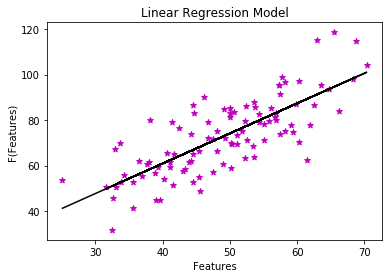

In [18]:
# plotting the points in a scatter plot
plt.scatter(features_DSH, labels_DSH,marker='*',color = 'm');

print('$R^2$ scores:',metrics.r2_score(labels_DSH, predict_Linear))

# fitting the model 
plt.plot(features_DSH, slope* features_DSH + intercept, color = 'k')
plt.title('Linear Regression Model')
plt.xlabel('Features')
plt.ylabel('F(Features)')

10\. Looking at the data (hours vs scores), do you think it would make sense to fit these data using a logistic regression model? Why or why not?

* **Based on the label data below, Logistic Regression would not be ideal at all. Tt would not make sense to fit this data using a logistic regression model. The reason is because we don't have or expect categorical predictions. Specically, I mean that the target vector ```labels_DSH ``` isn't categorical (n true/false, yes/no, up/down, etc). Check ```labels_DSH[:20] ```**

In [19]:
labels_DSH[:20]

array([31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513,
       78.21151827, 79.64197305, 59.17148932, 75.3312423 , 71.30087989,
       55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
       60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319])

Extra credit: Run the gradient descent notebook and report the coefficients you found here. Calculate the cost function (found in the linear regression notebook) for the slope, intercept values you found with the gradient descent method and the values you found above, using the formulas. Which set of values is best? 
